In [10]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

# Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

# Metric tools, and utility methods
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report,accuracy_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

### Preparing the Data

In [11]:
df = pd.read_csv('../raw_data/codon_usage.csv')

df.columns
df['DNAtype'] = df['DNAtype'].astype('category')
df['DNAtype'] = df['DNAtype'].cat.codes

codon_df = df.loc[:,df.columns[6:]]

# There is a string data on position 5063, so we need to drop it:
codon_df = codon_df.drop([5063])
df2 = df.drop([5063])
codon_df = codon_df.apply(pd.to_numeric)
print(codon_df.head())

       UUC      UUA      UUG      CUU      CUC      CUA      CUG      AUU  \
0  0.01203  0.00050  0.00351  0.01203  0.03208  0.00100  0.04010  0.00551   
1  0.01357  0.00068  0.00678  0.00407  0.02849  0.00204  0.04410  0.01153   
2  0.02180  0.01357  0.01543  0.00782  0.01111  0.01028  0.01193  0.02283   
3  0.02245  0.01619  0.00992  0.01567  0.01358  0.00940  0.01723  0.02402   
4  0.01371  0.00767  0.03679  0.01380  0.00548  0.00473  0.02076  0.02716   

       AUC      AUA  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.02005  0.00752  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.02510  0.00882  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01604  0.01316  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.02245  0.02507  ...  0.00366  0.01410  0.01671  0.03760  0.01932   
4  0.00867  0.01310  ...  0.00604  0.01494  0.01734  0.04148  0.02483   

       GAA      GAG      UAA      UAG      UGA  
0  0.01203  0.04361  0.00251  0.00050  0.00000  


/tmp/ipykernel_326128/2542641656.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../raw_data/codon_usage.csv')


In [12]:
# References in dictionary 

DNA_names = {0:'genomic',
           1:'mitochondrial', 
           2:'chloroplast', 
           3:'cyanelle', 
           4:'plastid', 
           5:'nucleomorph', 
           6:'secondary_endosymbiont', 
           7:'chromoplast', 
           8:'leucoplast', 
           9:'NA',
           10:'proplastid',
           11:'apicoplast', 
           12:'kinetoplast'}

Predicting DNA Type Based on Codon Frequency

In [13]:
X = codon_df
y = df2['DNAtype']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:
print(X.head())

       UUC      UUA      UUG      CUU      CUC      CUA      CUG      AUU  \
0  0.01203  0.00050  0.00351  0.01203  0.03208  0.00100  0.04010  0.00551   
1  0.01357  0.00068  0.00678  0.00407  0.02849  0.00204  0.04410  0.01153   
2  0.02180  0.01357  0.01543  0.00782  0.01111  0.01028  0.01193  0.02283   
3  0.02245  0.01619  0.00992  0.01567  0.01358  0.00940  0.01723  0.02402   
4  0.01371  0.00767  0.03679  0.01380  0.00548  0.00473  0.02076  0.02716   

       AUC      AUA  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.02005  0.00752  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.02510  0.00882  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01604  0.01316  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.02245  0.02507  ...  0.00366  0.01410  0.01671  0.03760  0.01932   
4  0.00867  0.01310  ...  0.00604  0.01494  0.01734  0.04148  0.02483   

       GAA      GAG      UAA      UAG      UGA  
0  0.01203  0.04361  0.00251  0.00050  0.00000  


### K Nearest Neighbor Model

In [15]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print(knn.score(X_test, y_test))

[[1850    1    1    0    0    0    0    0]
 [   5  575    1    0    0    0    0    0]
 [   4    1  153    0    4    0    0    0]
 [   0    0    2    0    0    0    0    0]
 [   3    0    1    0    2    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1852
           1       0.99      0.99      0.99       581
           2       0.97      0.94      0.96       162
           3       0.00      0.00      0.00         2
           4       0.33      0.33      0.33         6
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.99      2606
   macro avg       0.41      0.41      0.41      2606
weighted avg       0.99      0.99      0.99      2606

0.99

In [16]:
# Test Evaluation
test_df = pd.DataFrame([y_test.tolist(), y_pred.tolist()])
test_df = test_df.transpose()

test_df = test_df.rename(columns = { 0: "y_test", 1: "y_predict"})
test_df['Check'] = np.where(test_df['y_test'] == test_df['y_predict'], 1, 0)


total_test_case = test_df.Check.count()
correct_test_predict = test_df.value_counts('Check')[1]
incorrect_test_predict = test_df.value_counts('Check')[0]

print("Number of All Test Cases: {}".format(total_test_case))

print("Number of Correct Prediction: {}".format(correct_test_predict))

print("Number of Incorrect Prediction: {}".format(incorrect_test_predict))

Number of All Test Cases: 2606
Number of Correct Prediction: 2580
Number of Incorrect Prediction: 26


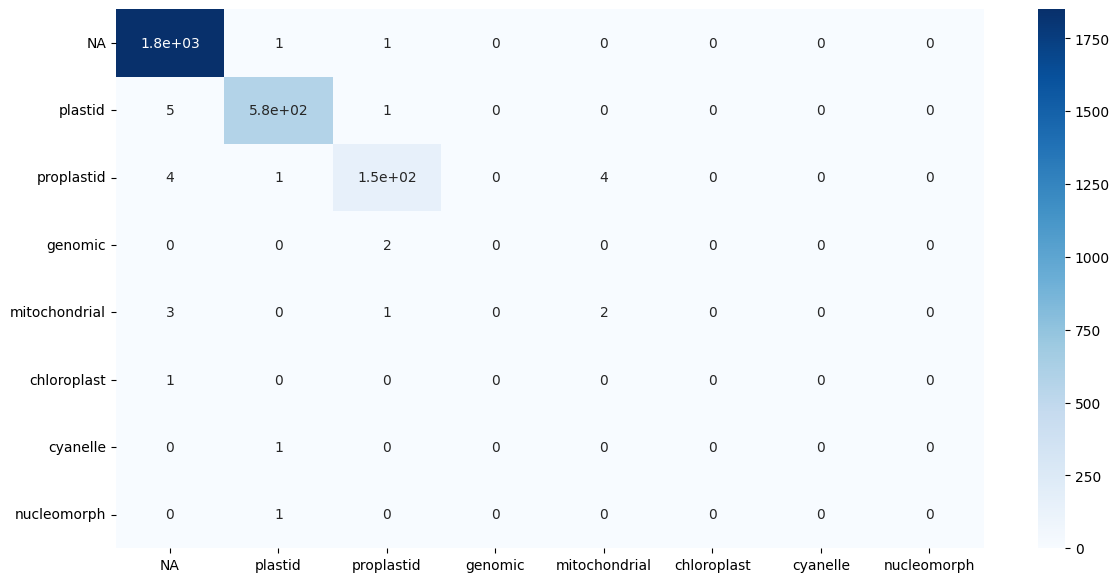

In [17]:
DNA = []

for item in y_test.unique():
    DNA.append(DNA_names[item])

for item in y_pred:
    DNA.append(DNA_names[item])

DNA = list(set(DNA))

knn_array = confusion_matrix(y_test, y_pred)
df_knn_confusion = pd.DataFrame(knn_array, 
    index = [i for i in DNA],
    columns = [i for i in DNA]
)

plt.figure(figsize = (14,7))
sns.heatmap(df_knn_confusion, annot=True, cmap='Blues')
plt.show()

### Random Forest Classifier Model

In [18]:
rfc = RandomForestClassifier(random_state=1)

ada_rf = AdaBoostClassifier(estimator=rfc, n_estimators=180, random_state=1)

ada_rf.fit(X_train,y_train)

y_pred = ada_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print(ada_rf.score(X_test, y_test))

[[1851    0    1    0    0    0    0    0]
 [  11  570    0    0    0    0    0    0]
 [   7    3  147    0    5    0    0    0]
 [   1    0    1    0    0    0    0    0]
 [   3    0    1    0    2    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1852
           1       0.99      0.98      0.99       581
           2       0.98      0.91      0.94       162
           3       0.00      0.00      0.00         2
           4       0.29      0.33      0.31         6
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.99      2606
   macro avg       0.41      0.40      0.40      2606
weighted avg       0.98      0.99      0.99      2606

0.98

In [19]:
#Test Evaluation
test_df = pd.DataFrame([y_test.tolist(), y_pred.tolist()])
test_df = test_df.transpose()

test_df = test_df.rename(columns = { 0: "y_test", 1: "y_predict"})
test_df['Check'] = np.where(test_df['y_test'] == test_df['y_predict'], 1, 0)


total_test_case = test_df.Check.count()
correct_test_predict = test_df.value_counts('Check')[1]
incorrect_test_predict = test_df.value_counts('Check')[0]

print("Number of All Test Cases: {}".format(total_test_case))

print("Number of Correct Prediction: {}".format(correct_test_predict))

print("Number of Incorrect Prediction: {}".format(incorrect_test_predict))

Number of All Test Cases: 2606
Number of Correct Prediction: 2570
Number of Incorrect Prediction: 36


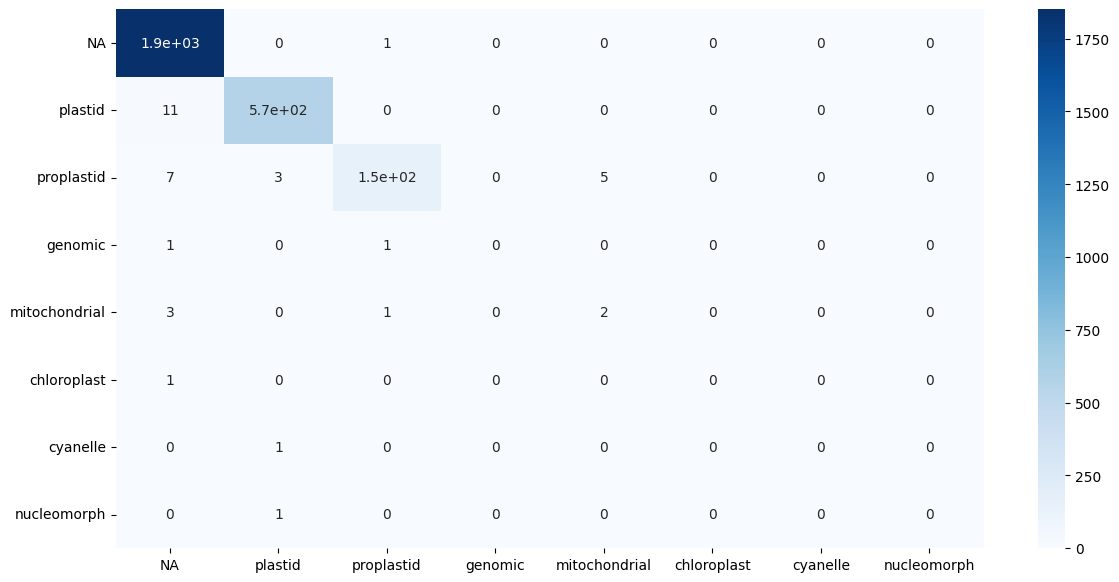

In [20]:
DNA = []

for item in y_test.unique():
    DNA.append(DNA_names[item])

for item in y_pred:
    DNA.append(DNA_names[item])

DNA = list(set(DNA))

rf_array = confusion_matrix(y_test, y_pred)
df_rf_confusion = pd.DataFrame(rf_array, 
    index = [i for i in DNA],
    columns = [i for i in DNA]
)

plt.figure(figsize = (14,7))
sns.heatmap(df_rf_confusion, annot=True, cmap='Blues')
plt.show()

### Decision Tree Classifier Model

In [21]:
dt = DecisionTreeClassifier()

ada_dt = AdaBoostClassifier(estimator=dt, random_state= 1)

ada_dt.fit(X_train, y_train)

y_pred = ada_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print(ada_dt.score(X_test, y_test))

[[1831    9   10    0    0    0    0    2]
 [  11  564    5    0    1    0    0    0]
 [  15    1  144    0    2    0    0    0]
 [   1    0    1    0    0    0    0    0]
 [   3    0    3    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0]
 [   0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1852
           1       0.98      0.97      0.97       581
           2       0.88      0.89      0.89       162
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.97      2606
   macro avg       0.48      0.48      0.48      2606
weighted avg       0.97      0.97      0.97      2606

0.97

In [22]:
#Test Evaluation
test_df = pd.DataFrame([y_test.tolist(), y_pred.tolist()])
test_df = test_df.transpose()

test_df = test_df.rename(columns = { 0: "y_test", 1: "y_predict"})
test_df['Check'] = np.where(test_df['y_test'] == test_df['y_predict'], 1, 0)


total_test_case = test_df.Check.count()
correct_test_predict = test_df.value_counts('Check')[1]
incorrect_test_predict = test_df.value_counts('Check')[0]

print("Number of All Test Cases: {}".format(total_test_case))

print("Number of Correct Prediction: {}".format(correct_test_predict))

print("Number of Incorrect Prediction: {}".format(incorrect_test_predict))

Number of All Test Cases: 2606
Number of Correct Prediction: 2540
Number of Incorrect Prediction: 66


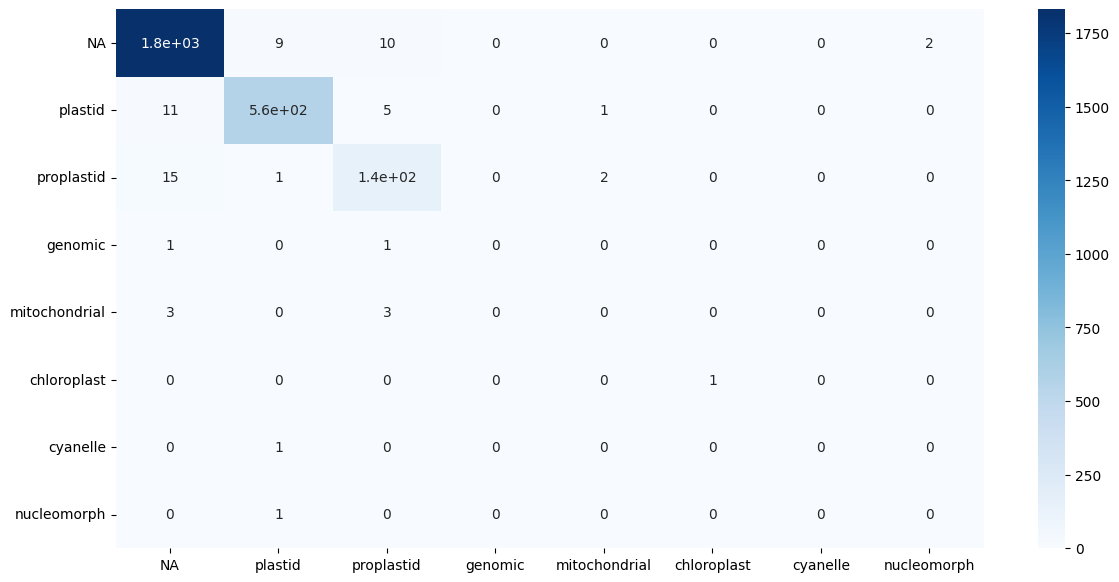

In [23]:
DNA = []

for item in y_test.unique():
    DNA.append(DNA_names[item])

for item in y_pred:
    DNA.append(DNA_names[item])

DNA = list(set(DNA))

dt_array = confusion_matrix(y_test, y_pred)
df_dt_confusion = pd.DataFrame(dt_array, 
    index = [i for i in DNA],
    columns = [i for i in DNA]
)

plt.figure(figsize = (14,7))
sns.heatmap(df_dt_confusion, annot=True, cmap='Blues')
plt.show()

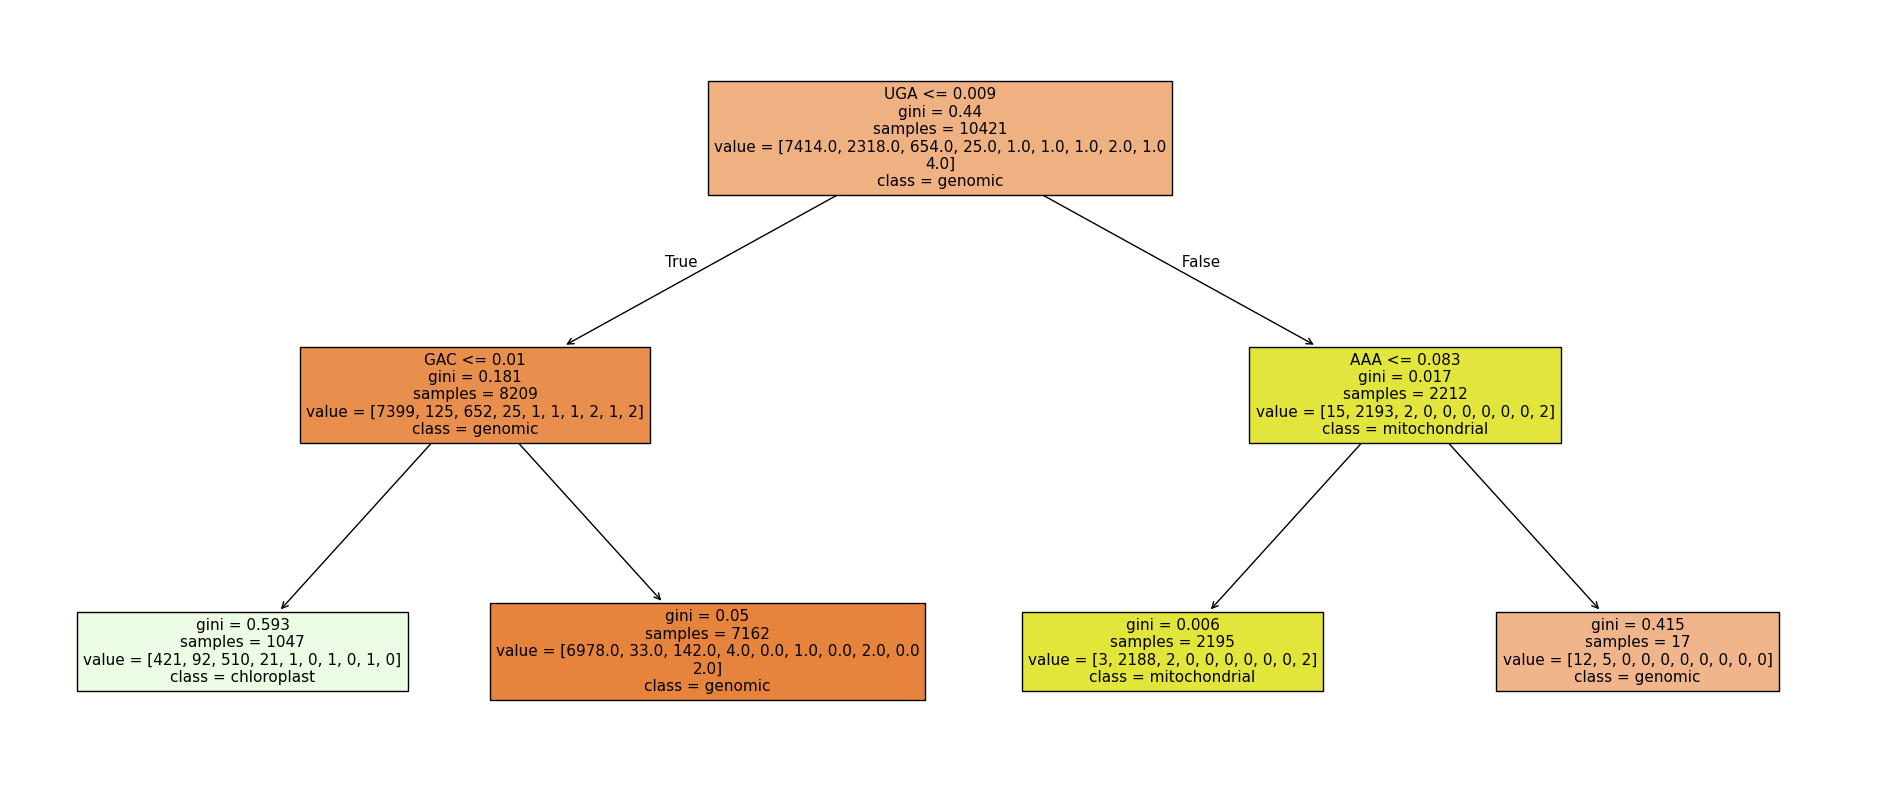

In [24]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(24,10))
_ = tree.plot_tree(dt, feature_names = X.columns, filled = True, class_names = list(DNA_names.values()))